In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# Generate test dataset
X, y = make_blobs(
    n_samples = 1000, 
    centers = 2, 
    random_state = 1, 
    cluster_std = 3)

# Convert ndarray to pandas datatypes
X = pd.DataFrame(X)
y = pd.Series(y)
display(X)
display(y)

,0,1
0,-5.855998,4.651793
1,-5.833791,-3.274749
2,7.433011,6.880244
3,-8.022102,-0.956644
4,-14.719933,-3.651568
...,...,...
995,-3.446564,3.479126
996,-13.772762,-5.854725
997,-2.436508,4.974369
998,-2.068894,4.049327


0      0
1      1
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    1
Length: 1000, dtype: int32

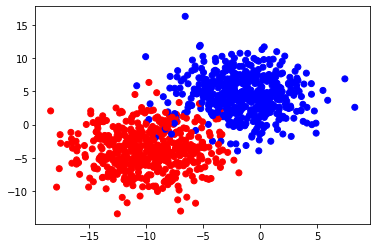

In [4]:
# Plot test data
plt.scatter(
    x = X[0],
    y = X[1], 
    c = y, 
    cmap = "bwr")

plt.show()

In [5]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(750, 2)

In [8]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Fit the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
# Make predictions using the test data
y_pred = lr.predict(X_test_scaled)

results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)

results.head()

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


In [12]:
# Import Modules
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[115   3]
 [  4 128]]


|  | Predicted True | Predicted False |
| --- | --- | --- |
| Actually True | 115 TPs | 3 FNs |
| Actually False | 4 FPs | 124 TNs |

In [11]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       123
           1       0.96      0.98      0.97       127

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



* F1 score (a.k.a Accuracy) is a weighted average of the recall (sensitivity) and precision. 
* F1 score might be good choice when you seek to balance between Precision and Recall
* It helps to compute recall and precision in one equation so that the problem to distinguish the models with low recall and high precision or vice versa could be solved